In [8]:
run = 'E1154'
exposure = 'None'

In [9]:
from lsst.daf.butler import Butler
import pylab
import traceback
butler = Butler('embargo_new', collections=['LSSTCam/raw/all', 'LSSTCam/calib/unbounded'])

In [10]:
sensor="R01_S11"
detector=list(butler.registry.queryDimensionRecords("detector",instrument='LSSTCam',where=f"detector.full_name='{sensor}'"))[0].id
detector

4

In [11]:
collections=butler.registry.queryCollections(f'*/ptc*{run}*')

In [12]:
if exposure == 'None':
    exposures = list(butler.registry.queryDimensionRecords("exposure", 
                    where=f"exposure.science_program='{run}' and instrument='LSSTCam' and exposure.observation_reason='flat' and exposure.observation_type='flat'"))
else:
    class hoge:
        pass
    huga=hoge()
    huga.id = int(exposure)
    exposures = [ huga ]

Text(0, 0.5, 'CURRENT')

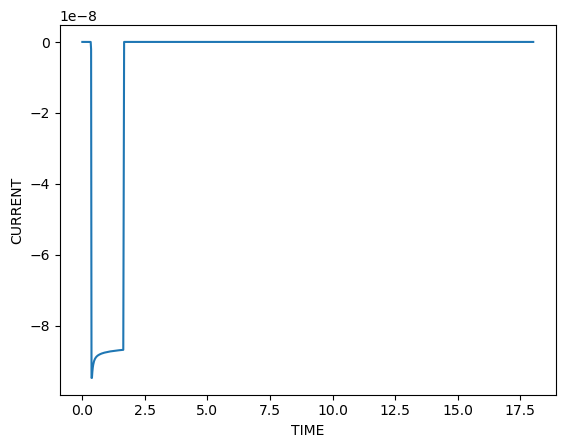

In [13]:
for anexposure in list(exposures)[::]:
    try:
        photodiode = butler.get('photodiode', collections=collections,detector=detector, exposure=anexposure.id)
        table = photodiode.toTable()[0]
        pylab.plot(table['TIME'].T, table['CURRENT'].T,"-")     ### I think there is a bug in to_Table
    except:
        print(anexposure.id)
        traceback.print_exc()
pylab.xlabel('TIME')
pylab.ylabel('CURRENT')

Text(0, 0.5, 'INTEGRATED CURRENT')

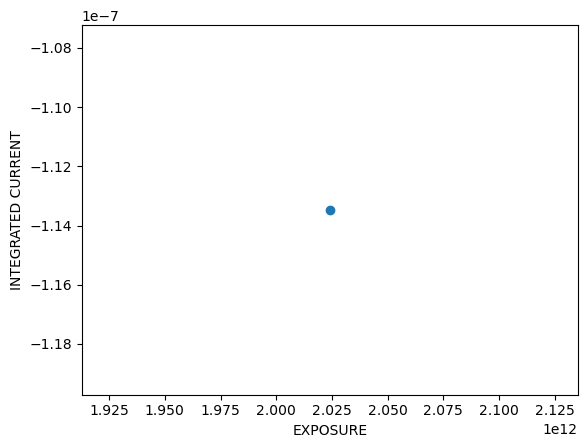

In [14]:
for anexposure in list(exposures)[::]:
    try:
        photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=anexposure.id)
        table = photodiode.toTable()[0]
        pylab.scatter( photodiode.getMetadata()['EXPOSURE'], photodiode.integrate() )
    except:
        pylab.axvline(anexposure.id)
        traceback.print_exc()
pylab.xlabel('EXPOSURE')
pylab.ylabel('INTEGRATED CURRENT')